Training: Logistic Regression
Training: Decision Tree
Training: Random Forest
Training: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [02:51:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training: SVM
Training: KNN
Training: Naive Bayes
Training: Neural Network


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Model: Logistic Regression
ROC AUC: 0.9042148127759706
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      7431
           1       0.74      0.59      0.66      2338

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.85      0.85      0.85      9769

Confusion Matrix:
 [[6951  480]
 [ 962 1376]]

Model: Decision Tree
ROC AUC: 0.7488208311446775
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      7431
           1       0.61      0.62      0.62      2338

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769

Confusion Matrix:
 [[6514  917]
 [ 886 1452]]

Model: Random Forest
ROC AUC: 0.9036413302928719
Classification Report:
               precision   

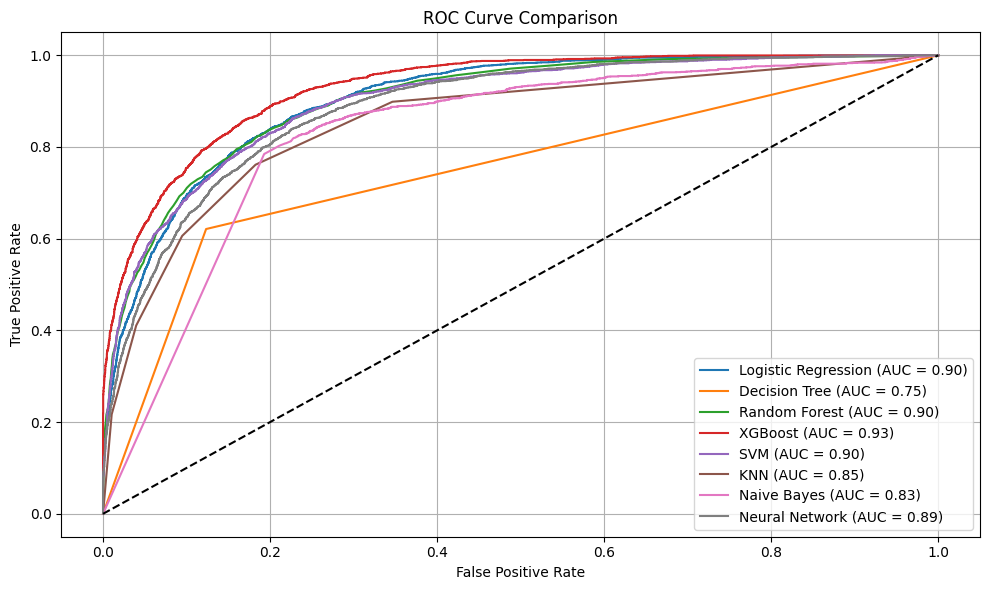

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


df = pd.read_csv("/content/adult 3.csv")  # change to your actual file name
df.replace("?", np.nan, inplace=True)

df["income"] = df["income"].map({"<=50K": 0, ">50K": 1})

X = df.drop("income", axis=1)
y = df["income"]

categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

numerical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
    ("num", numerical_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(max_iter=300)
}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

results = {}
roc_data = {}

for name, model in models.items():
    print(f"Training: {name}")
    clf = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf.named_steps["classifier"], "predict_proba") else clf.decision_function(X_test)

    results[name] = {
        "report": classification_report(y_test, y_pred, output_dict=False),
        "conf_matrix": confusion_matrix(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba)
    }

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_data[name] = (fpr, tpr)

for name, result in results.items():
    print(f"\nModel: {name}")
    print("ROC AUC:", result["roc_auc"])
    print("Classification Report:\n", result["report"])
    print("Confusion Matrix:\n", result["conf_matrix"])

plt.figure(figsize=(10, 6))
for name, (fpr, tpr) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {results[name]['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:00:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: Logistic Regression
ROC AUC Score: 0.9097
Classification Report:
              precision    recall  f1-score      support
0              0.947915  0.805455  0.870898  7479.000000
1              0.573814  0.855459  0.686886  2290.000000
accuracy       0.817177  0.817177  0.817177     0.817177
macro avg      0.760864  0.830457  0.778892  9769.000000
weighted avg   0.860220  0.817177  0.827763  9769.000000
Confusion Matrix:
[[6024 1455]
 [ 331 1959]]
------------------------------------------------------------
Model: Decision Tree
ROC AUC Score: 0.7662
Classification Report:
              precision    recall  f1-score      support
0              0.896726  0.853323  0.874486  7479.000000
1              0.586350  0.679039  0.629300  2290.000000
accuracy       0.812468  0.812468  0.812468     0.812468
macro avg      0.741538  0.766181  0.751893  9769.000000
weighted avg   0.823969  0.812468  0.817011  9769.000000
Confusion Matrix:
[[6382 1097]
 [ 735 1555]]
---------------------------

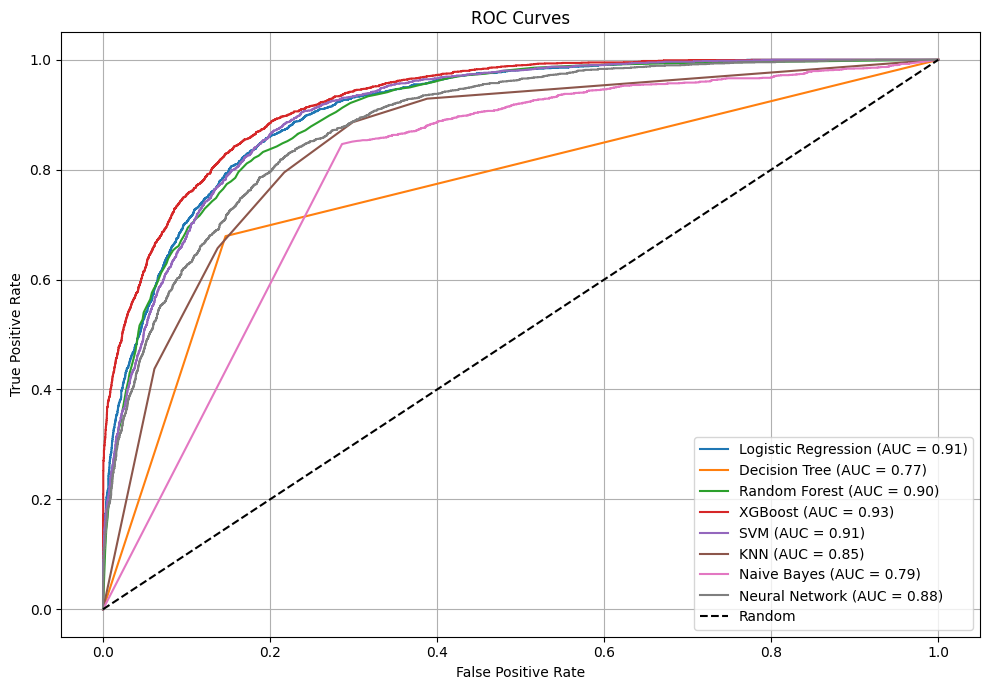

['preprocessor.pkl']

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

df = pd.read_csv("/content/adult 3.csv")

df.dropna(inplace=True)

X = df.drop("income", axis=1)
y = df["income"].apply(lambda x: 1 if x == ">50K" else 0)

categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_transformed, y_train)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(max_iter=300)
}

results = {}
roc_data = {}

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_transformed)
    y_proba = model.predict_proba(X_test_transformed)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_transformed)

    report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    results[name] = {
        "classification_report": report,
        "confusion_matrix": confusion,
        "roc_auc": roc_auc
    }
    roc_data[name] = (fpr, tpr)

for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"ROC AUC Score: {metrics['roc_auc']:.4f}")
    print("Classification Report:")
    print(pd.DataFrame(metrics["classification_report"]).transpose())
    print("Confusion Matrix:")
    print(metrics["confusion_matrix"])
    print("-" * 60)

plt.figure(figsize=(10, 7))
for name, (fpr, tpr) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {results[name]['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

best_model_name = max(results.items(), key=lambda x: x[1]['roc_auc'])[0]
joblib.dump(models[best_model_name], f"{best_model_name.lower().replace(' ', '_')}_smote.pkl")
joblib.dump(preprocessor, "preprocessor.pkl")
